In [1]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
pd.set_option('display.max_rows', None)

In [2]:
# Reading data
filename = 'KTUS.csv'

In [3]:
# Read the data into a pandas dataframe, and define columns, header and index
df = pd.read_csv(filename, sep = ',',index_col='Date_Time',skiprows=7,
        names =['Station_ID','Date_Time',
                'air_temp_set_1_F','dew_point_temperature_set_1_F','precip_accum_one_hour_set_1_Inches',
                'dew_point_temperature_set_1d_F'])

In [4]:
# Rename columns, and index
df.columns = ['Station_ID','Air_Temp_F','Dewpoint_Temp_F','Precip_1Hour_Accum_Inches',
                'Dewpoint_Temp_set2_F']

In [5]:
# See that the index is just an array
df.index.values

array(['07/01/2021 00:00 UTC', '07/01/2021 00:05 UTC',
       '07/01/2021 00:10 UTC', ..., '07/31/2021 23:50 UTC',
       '07/31/2021 23:53 UTC', '07/31/2021 23:55 UTC'], dtype=object)

In [6]:
# Set index data type to a DateTime object
df.index = pd.to_datetime(df.index)
# Now we should see the index is a DateTime object
df.index

DatetimeIndex(['2021-07-01 00:00:00+00:00', '2021-07-01 00:05:00+00:00',
               '2021-07-01 00:10:00+00:00', '2021-07-01 00:15:00+00:00',
               '2021-07-01 00:20:00+00:00', '2021-07-01 00:25:00+00:00',
               '2021-07-01 00:27:00+00:00', '2021-07-01 00:30:00+00:00',
               '2021-07-01 00:35:00+00:00', '2021-07-01 00:40:00+00:00',
               ...
               '2021-07-31 23:15:00+00:00', '2021-07-31 23:20:00+00:00',
               '2021-07-31 23:25:00+00:00', '2021-07-31 23:30:00+00:00',
               '2021-07-31 23:35:00+00:00', '2021-07-31 23:40:00+00:00',
               '2021-07-31 23:45:00+00:00', '2021-07-31 23:50:00+00:00',
               '2021-07-31 23:53:00+00:00', '2021-07-31 23:55:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date_Time', length=9110, freq=None)

In [7]:
##########################
# Navigate the DataFrame #
##########################
df.shape  # See how many rows and columns the data has

(9110, 5)

In [8]:
df.head(5) # look at the first x rows of the data

,Station_ID,Air_Temp_F,Dewpoint_Temp_F,Precip_1Hour_Accum_Inches,Dewpoint_Temp_set2_F
Date_Time,,,,,
2021-07-01 00:00:00+00:00,KTUS,93.2,NaN,NaN,53.86
2021-07-01 00:05:00+00:00,KTUS,93.2,NaN,NaN,55.65
2021-07-01 00:10:00+00:00,KTUS,93.2,NaN,NaN,55.65
2021-07-01 00:15:00+00:00,KTUS,89.6,NaN,NaN,60.94
2021-07-01 00:20:00+00:00,KTUS,87.8,NaN,NaN,60.91


In [9]:
df.tail(5) # look at the last  x rows  of the data

,Station_ID,Air_Temp_F,Dewpoint_Temp_F,Precip_1Hour_Accum_Inches,Dewpoint_Temp_set2_F
Date_Time,,,,,
2021-07-31 23:40:00+00:00,KTUS,91.40,NaN,NaN,62.76
2021-07-31 23:45:00+00:00,KTUS,93.20,NaN,NaN,62.80
2021-07-31 23:50:00+00:00,KTUS,93.20,NaN,NaN,62.80
2021-07-31 23:53:00+00:00,KTUS,93.02,62.96,NaN,63.16
2021-07-31 23:55:00+00:00,KTUS,93.20,NaN,NaN,62.80


In [10]:
df.iloc[20:30] # grab any subset of rows to look at

,Station_ID,Air_Temp_F,Dewpoint_Temp_F,Precip_1Hour_Accum_Inches,Dewpoint_Temp_set2_F
Date_Time,,,,,
2021-07-01 01:30:00+00:00,KTUS,87.8,NaN,NaN,59.12
2021-07-01 01:35:00+00:00,KTUS,87.8,NaN,NaN,57.33
2021-07-01 01:40:00+00:00,KTUS,87.8,NaN,NaN,55.53
2021-07-01 01:45:00+00:00,KTUS,87.8,NaN,NaN,57.33
2021-07-01 01:50:00+00:00,KTUS,87.8,NaN,NaN,57.33
2021-07-01 01:53:00+00:00,KTUS,86.0,59.0,NaN,59.09
2021-07-01 01:55:00+00:00,KTUS,86.0,NaN,NaN,59.09
2021-07-01 02:00:00+00:00,KTUS,86.0,NaN,NaN,59.09
2021-07-01 02:05:00+00:00,KTUS,84.2,NaN,NaN,59.07


In [11]:
df.Air_Temp_F[350:360]  #Grab a subset of just the temp data to look at

Date_Time
2021-07-02 02:40:00+00:00    87.80
2021-07-02 02:45:00+00:00    87.80
2021-07-02 02:50:00+00:00    87.80
2021-07-02 02:53:00+00:00    87.08
2021-07-02 02:55:00+00:00    87.80
2021-07-02 03:00:00+00:00    87.80
2021-07-02 03:05:00+00:00    87.80
2021-07-02 03:10:00+00:00    87.80
2021-07-02 03:15:00+00:00    86.00
2021-07-02 03:20:00+00:00    86.00
Name: Air_Temp_F, dtype: float64

In [12]:
df.loc['2021-07-27']  #find a specific date

,Station_ID,Air_Temp_F,Dewpoint_Temp_F,Precip_1Hour_Accum_Inches,Dewpoint_Temp_set2_F
Date_Time,,,,,
2021-07-27 00:00:00+00:00,KTUS,93.20,NaN,NaN,61.01
2021-07-27 00:05:00+00:00,KTUS,91.40,NaN,NaN,60.98
2021-07-27 00:10:00+00:00,KTUS,93.20,NaN,NaN,61.01
2021-07-27 00:15:00+00:00,KTUS,93.20,NaN,NaN,61.01
2021-07-27 00:20:00+00:00,KTUS,91.40,NaN,NaN,60.98
2021-07-27 00:25:00+00:00,KTUS,91.40,NaN,NaN,60.98
2021-07-27 00:30:00+00:00,KTUS,91.40,NaN,NaN,60.98
2021-07-27 00:35:00+00:00,KTUS,91.40,NaN,NaN,59.18
2021-07-27 00:40:00+00:00,KTUS,91.40,NaN,NaN,60.98


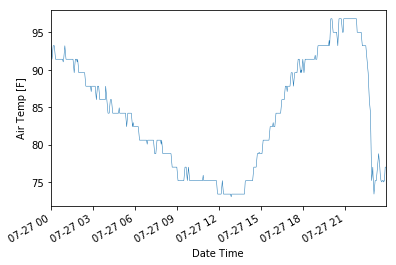

In [13]:
# make a quick plot
ax=df['Air_Temp_F'].loc['2021-07-27'].plot(linewidth=0.5)
ax.set_ylabel('Air Temp [F]')
ax.set_xlabel('Date Time')
plt.show()

In [14]:
######################################################
# Resample to daily data and make more detailed plot #
######################################################

# resample to daily, and chose how to group sub-daily data, mean for T and last value for P
daily_airtemp = df['Air_Temp_F'].resample('1D').mean()
daily_dewtemp = df['Dewpoint_Temp_set2_F'].resample('1D').mean()
daily_precipacc = df['Precip_1Hour_Accum_Inches'].resample('1D').last()

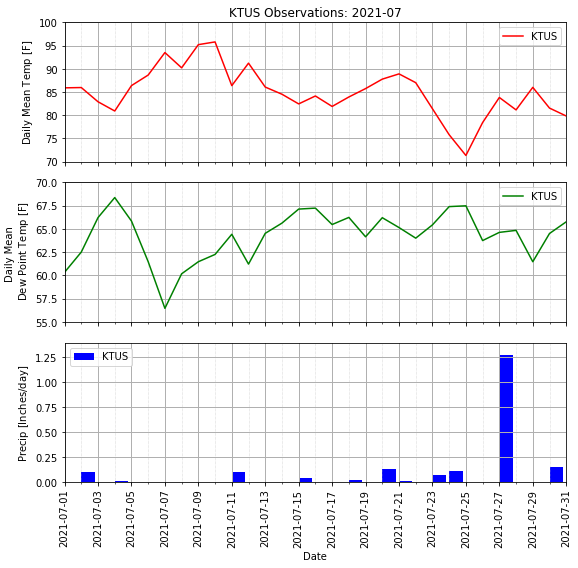

In [15]:
# Make a detailed plot
# set up the fig and axis, we'll make a panel plot with a shared x axis
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8), sharex=True)

# set plotting dates
start = '2021-07-01'
end = '2021-07-31'

# on ax1 plot air temp data, no markers, solid line, red, with the KTUS label
ax1.plot(daily_airtemp[start:end],marker="",linestyle='-',alpha=1.,color="Red",label="KTUS")
# put label/legend in top right =1
ax1.legend(loc=1)
# add major and minor gridlines
ax1.grid(which='major', linestyle='-', linewidth='1.0')
ax1.grid(which='minor', linestyle=':', linewidth='0.5')
# add y-axis label
ax1.set_ylabel('Daily Mean Temp [$\mathrm{F}$]') 
# set limits of y axis
ax1.set_ylim(70,100)
# set title for the whole panel plot
ax1.set_title('KTUS Observations: 2021-07')

# same again but on ax2 and for dew point temp
ax2.plot(daily_dewtemp[start:end],marker="",linestyle='-',alpha=1.,color="Green",label="KTUS")
ax2.legend(loc=1)
ax2.grid(which='major', linestyle='-', linewidth='1.0')
ax2.grid(which='minor', linestyle=':', linewidth='0.5')
ax2.set_ylabel('Daily Mean \n Dew Point Temp [$\mathrm{F}$]') 
ax2.set_ylim(55,70)

# plot daily precip as a bar plot, align it at the edge so bar it to the right of tick, 
ax3.bar(daily_precipacc[start:end].index, daily_precipacc[start:end], 
        align='edge',alpha=1.,color="Blue",label="KTUS")
ax3.legend(loc=2)
ax3.grid(which='major', linestyle='-', linewidth='1.0')
ax3.grid(which='minor', linestyle=':', linewidth='0.5')
ax3.set_ylabel('Precip [$\mathrm{Inches/day}$]') 
ax3.set_ylim(0,1.4)

# formatting of x-axis dates, rotate them 90 degrees 
fig.autofmt_xdate(rotation=90, ha='center')
# put a label every two days
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
# but make sure minor ticks show each day
ax3.get_xaxis().set_minor_locator(mdates.DayLocator())
# set label and limits
ax3.set_xlabel('Date')
ax3.set_xlim(start,end)

# name, save and show the plot
plotfile = 'KTUS_July_21_timeseries.png'
plt.tight_layout()
sf = fig.savefig(plotfile, dpi=300)
plt.show()